In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.ticker as mtick 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [2]:
dt = pd.read_csv('../data/test.csv')
dt.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [3]:
dt.shape

(25976, 25)

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

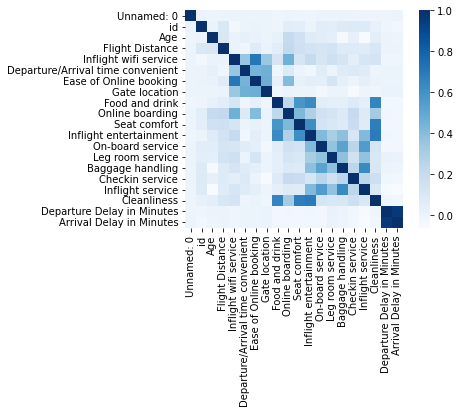

In [5]:
corr_mat = dt.corr()
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass

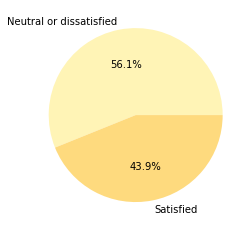

In [6]:
plt.pie(dt.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"],
        colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

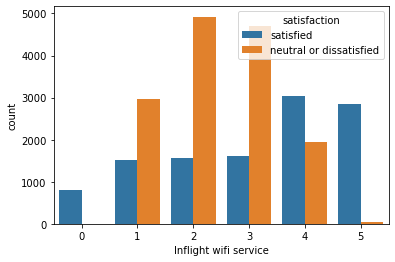

In [7]:
sns.countplot(x =dt['Inflight wifi service'], hue = dt['satisfaction'])
plt.show()

<AxesSubplot:xlabel='Online boarding', ylabel='count'>

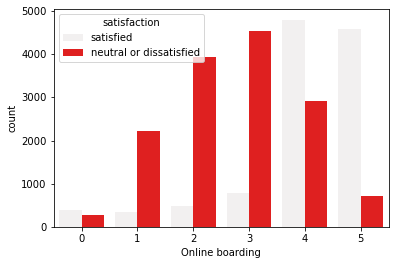

In [8]:
sns.countplot(x='Online boarding',hue="satisfaction",data=dt,color="red")

According to this graph, you can see that almost all passengers who rated the wifi service 5 out of 5 points were satisfied with the flight.

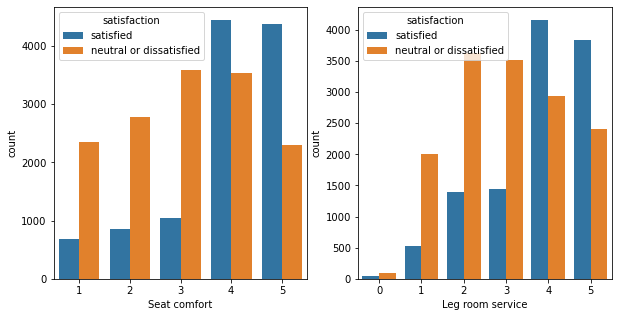

In [9]:
f, ax = plt.subplots(1, 2, figsize = (10,5))
sns.countplot(x = dt['Seat comfort'], hue = dt['satisfaction'],ax = ax[0])
sns.countplot(x = dt['Leg room service'], hue = dt['satisfaction'], ax = ax[1])
plt.show()

In [10]:
dt['Arrival Delay in Minutes'] = pd.to_numeric(dt['Arrival Delay in Minutes'], errors='coerce')
dt.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


As you can see from the pie chart, the selection is more or less balanced.

In [11]:
dt.fillna(dt['Arrival Delay in Minutes'].mean() , inplace = True)

In [12]:
dt.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [13]:
dt['satisfaction'].value_counts()

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64

In [14]:
#convert satisfaction to numeric as long as it's the goal of the pproject
dt['satisfaction'].replace(to_replace='satisfied', value=1, inplace=True)
dt['satisfaction'].replace(to_replace='neutral or dissatisfied',  value=0, inplace=True)
dt['satisfaction'].value_counts()

0    14573
1    11403
Name: satisfaction, dtype: int64

In [15]:
dt.drop('Unnamed: 0' ,axis = 1, inplace = True)
dt.drop('id' ,axis = 1, inplace = True)

In [16]:
dt.groupby(['Gender' , 'satisfaction'])['satisfaction'].count()

Gender  satisfaction
Female  0               7437
        1               5735
Male    0               7136
        1               5668
Name: satisfaction, dtype: int64

In [17]:
dt['Gender'].replace(to_replace='Male', value=1, inplace=True)
dt['Gender'].replace(to_replace='Female',  value=0, inplace=True)
dt[['satisfaction' , 'Gender']]

,satisfaction,Gender
0,1,0
1,1,0
2,0,1
3,1,1
4,1,0
...,...,...
25971,0,1
25972,1,1
25973,0,0
25974,1,1


In [18]:
#Female 0 
#Male 1 
dt['Gender'].value_counts()

0    13172
1    12804
Name: Gender, dtype: int64

In [19]:
dt_dummies = pd.get_dummies(dt)
dt_dummies.head()

,Gender,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0,52,160,5,4,3,4,3,4,3,...,50,44.0,1,1,0,1,0,0,1,0
1,0,36,2863,1,1,3,1,5,4,5,...,0,0.0,1,1,0,1,0,1,0,0
2,1,20,192,2,0,2,4,2,2,2,...,0,0.0,0,0,1,1,0,0,1,0
3,1,44,3377,0,0,0,2,3,4,4,...,0,6.0,1,1,0,1,0,1,0,0
4,0,49,1182,2,3,4,3,4,1,2,...,0,20.0,1,1,0,1,0,0,1,0


In [20]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
dt = dt.apply(lambda x: object_to_int(x))

In [21]:
#split the data into Train and Test
X = dt.drop(columns = ['satisfaction']) # All the column except churn
y = dt['satisfaction'].values #Just churn column as long as it's the main target

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 40)

In [22]:
print(dt.shape)
print(X_train.shape)
print(X_test.shape)

(25976, 23)
(20780, 22)
(5196, 22)


In [23]:
dt_lr = LogisticRegression(max_iter = 10000)
dt_lr.fit(X_train,y_train)
accuracy_lr = dt_lr.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
lr_pred= dt_lr.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

Logistic Regression accuracy is : 0.8749037721324096
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2917
           1       0.87      0.84      0.85      2279

    accuracy                           0.87      5196
   macro avg       0.87      0.87      0.87      5196
weighted avg       0.87      0.87      0.87      5196



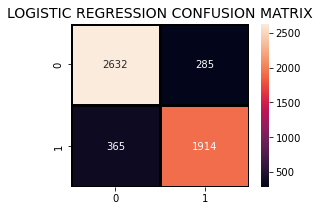

In [24]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [25]:
dt_tree = DecisionTreeClassifier()
dt_tree.fit(X_train,y_train)
predictdt_y = dt_tree.predict(X_test)
accuracy_dt = dt_tree.score(X_test,y_test)
print("DT accuracy is :",accuracy_dt)
print(classification_report(y_test, predictdt_y))


DT accuracy is : 0.9382217090069284
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2917
           1       0.93      0.93      0.93      2279

    accuracy                           0.94      5196
   macro avg       0.94      0.94      0.94      5196
weighted avg       0.94      0.94      0.94      5196



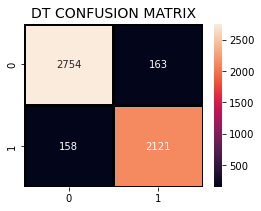

In [26]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictdt_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("DT CONFUSION MATRIX",fontsize=14)
plt.show()

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf=rf.predict(X_test)
accuracy_rf = rf.score(X_test, y_test)
print("RF accuracy is :",accuracy_rf)
print(classification_report(y_test, pred_rf))

RF accuracy is : 0.9582371054657429
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2917
           1       0.96      0.94      0.95      2279

    accuracy                           0.96      5196
   macro avg       0.96      0.96      0.96      5196
weighted avg       0.96      0.96      0.96      5196



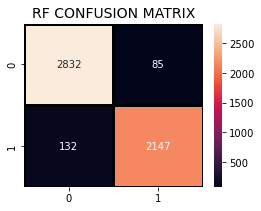

In [28]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, pred_rf),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RF CONFUSION MATRIX",fontsize=14)
plt.show()

In [29]:
#Accuracy Score
results = pd.DataFrame([["Logistic Regression",accuracy_lr],["Decision Tree",accuracy_dt],["Random Forest",accuracy_rf]],
                        columns = ["Models","Accuracy Score"])

results

,Models,Accuracy Score
0,Logistic Regression,0.874904
1,Decision Tree,0.938222
2,Random Forest,0.958237
